In [9]:
import FdsPy.qe.myqengine as qe
import pandas as pd

univ = qe.ScreenUniverse(universe_expr= '(FG_CONSTITUENTS(SP50,0,CLOSE)=1 OR PMWU(LION:PRNHX-US,0,CLOSE)=1)=1')

freq = 'Q'
ts = qe.TimeSeries(start_date='19841231',end_date = '0',frequency=freq,calendar = 'NAY')

data_dict = {
            "sp50_wgt":'FG_CONST_WEIGHT(SP50,0,CLOSE)',
            "nh_emv":'PMWDB(LION:PRNHX-US,"EMV",0,B,M,S,,B,NAN)',
            "ey":'QFL_EY(0,CT)',
            'price':'P_PRICE(0,USD)',
            'tret':'P_PRICE_RETURNS(1,-1/31/0,0,USD)'
            }


calc = qe.Calculation(universe = univ,dates =ts,data_dict=data_dict)

calc.query()
calc.data


,DATE,UNIVERSE,sp50_wgt,nh_emv,ey,price,tret
0,19841231,ILXO,NaN,0.0,NaN,NaN,NaN
1,19841231,ODP,NaN,0.0,NaN,NaN,NaN
2,19841231,PRDS.,NaN,0.0,NaN,NaN,NaN
3,19841231,PGNX,NaN,0.0,NaN,NaN,NaN
4,19841231,TLRK,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
104778,20230929,WBD,0.067027,NaN,-25.379680,10.86,-17.35160
104779,20230929,PRME,NaN,11220600.0,-16.204235,9.54,-27.94560
104780,20230929,KVUE,0.096295,NaN,5.427676,20.08,-12.88500
104781,20230929,ATMU,NaN,11816100.0,9.794104,20.85,-9.54446


In [10]:
import numpy as np
df = calc.data.copy()
df= df.set_index(['DATE',"UNIVERSE"])
dfx = df['nh_emv'].dropna().unstack()


df['nh_wgt']= dfx.apply(lambda x: x/dfx.sum(axis=1)).stack()

#df['nh_emv'] = df['nh_emv'].apply(lambda x: np.nan if x<0 else x)

df['ey'] = df['ey'].apply(lambda x: np.nan if x<2 else x)

#df['nh_wgt'] = df.groupby('DATE')['nh_emv'].transform(lambda x: x / x.sum())

import numpy as np
df['pe'] = ((df['ey'].apply(lambda x: np.nan if x <1.5 else x)/100)**-1)
df['pe'] = df['pe'].apply(lambda x: np.nan if x <1 else x)

df['sp_50_pe'] = df['pe']*(df['sp50_wgt']/100)
df['nh_pe'] = df['pe']*df['nh_wgt']

df

sp50_wgt      nh_emv        ey  price      tret    nh_wgt  \
DATE     UNIVERSE                                                              
19841231 ILXO           NaN         0.0       NaN    NaN       NaN  0.000000   
         ODP            NaN         0.0       NaN    NaN       NaN  0.000000   
         PRDS.          NaN         0.0       NaN    NaN       NaN  0.000000   
         PGNX           NaN         0.0       NaN    NaN       NaN  0.000000   
         TLRK           NaN         0.0       NaN    NaN       NaN  0.000000   
...                     ...         ...       ...    ...       ...       ...   
20230929 WBD       0.067027         NaN       NaN  10.86 -17.35160       NaN   
         PRME           NaN  11220600.0       NaN   9.54 -27.94560  0.000466   
         KVUE      0.096295         NaN  5.427676  20.08 -12.88500       NaN   
         ATMU           NaN  11816100.0  9.794104  20.85  -9.54446  0.000491   
         LPTX           NaN    523620.0       NaN   1.38 -38.11660  0.000022   

                          pe  sp_50_pe     nh_pe  
DATE     UNIVERSE                                 
19841231 ILXO            NaN       NaN       NaN  
         ODP             NaN       NaN       NaN  
         PRDS.           NaN       NaN       NaN  
         PGNX            NaN       NaN       NaN  
         TLRK            NaN       NaN       NaN  
...                      ...       ...       ...  
20230929 WBD             NaN       NaN       NaN  
         PRME            NaN       NaN       NaN  
         KVUE      18.424092  0.017741       NaN  
         ATMU      10.210224       NaN  0.005011  
         LPTX            NaN       NaN       NaN  

[104783 rows x 9 columns]

In [11]:
dfg = df.fillna(0).groupby('DATE').agg({'sp_50_pe':'sum',
                        'nh_pe':'sum'})

dfg['nh_to_sp']= dfg['nh_pe']/dfg['sp_50_pe']
dfg

,sp_50_pe,nh_pe,nh_to_sp
DATE,,,
19841231,0.000000,0.000000,NaN
19850329,0.000000,0.000000,NaN
19850628,0.000000,0.000000,NaN
19850930,0.000000,0.000000,NaN
19851231,0.000000,0.000000,NaN
...,...,...,...
20220930,17.403013,9.678418,0.556135
20221230,19.456964,11.620309,0.597231
20230331,19.784408,13.450833,0.679870


In [12]:
df.sort_values('nh_pe').dropna()

,,sp50_wgt,nh_emv,ey,price,tret,nh_wgt,pe,sp_50_pe,nh_pe
DATE,UNIVERSE,,,,,,,,,
20120928,TER,0.020709,7.110000e+06,12.551929,14.22,-8.962860,0.000010,7.966903,0.001650,0.000083
20121231,TER,0.024900,8.445000e+06,11.621396,16.89,7.992320,0.000013,8.604818,0.002143,0.000108
20191231,INCY,0.058338,4.133380e+06,2.153094,87.32,-7.264230,0.000003,46.444791,0.027095,0.000143
20120629,TER,0.021333,9.139000e+06,11.938339,14.06,-2.698960,0.000017,8.376375,0.001787,0.000144
20130328,TER,0.022083,8.110000e+06,7.031272,16.22,-3.221960,0.000011,14.222178,0.003141,0.000150
...,...,...,...,...,...,...,...,...,...,...
20221230,ROP,0.142608,7.048470e+08,2.135505,432.09,-1.549370,0.030369,46.827331,0.066779,1.422119
20220331,WST,0.079465,9.663110e+08,2.131370,410.71,6.104680,0.031013,46.918179,0.037283,1.455077
20211231,ODFL,0.082728,1.388300e+09,2.307261,358.38,0.903785,0.034999,43.341434,0.035856,1.516887


<Axes: xlabel='DATE'>

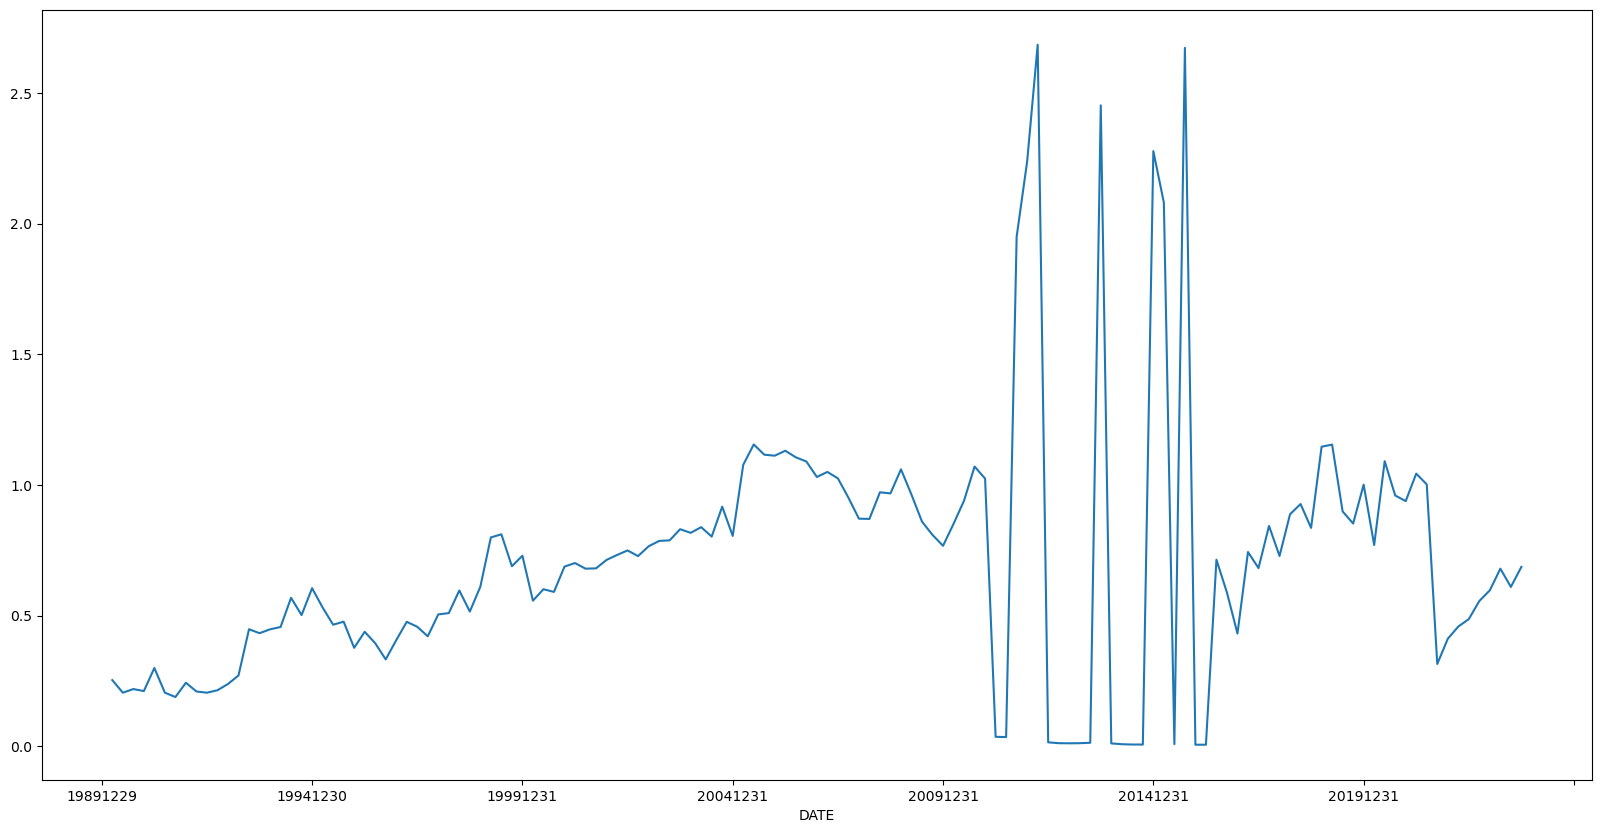

In [13]:
dfg['nh_to_sp'].plot(figsize = (20,10))

<Axes: xlabel='DATE'>

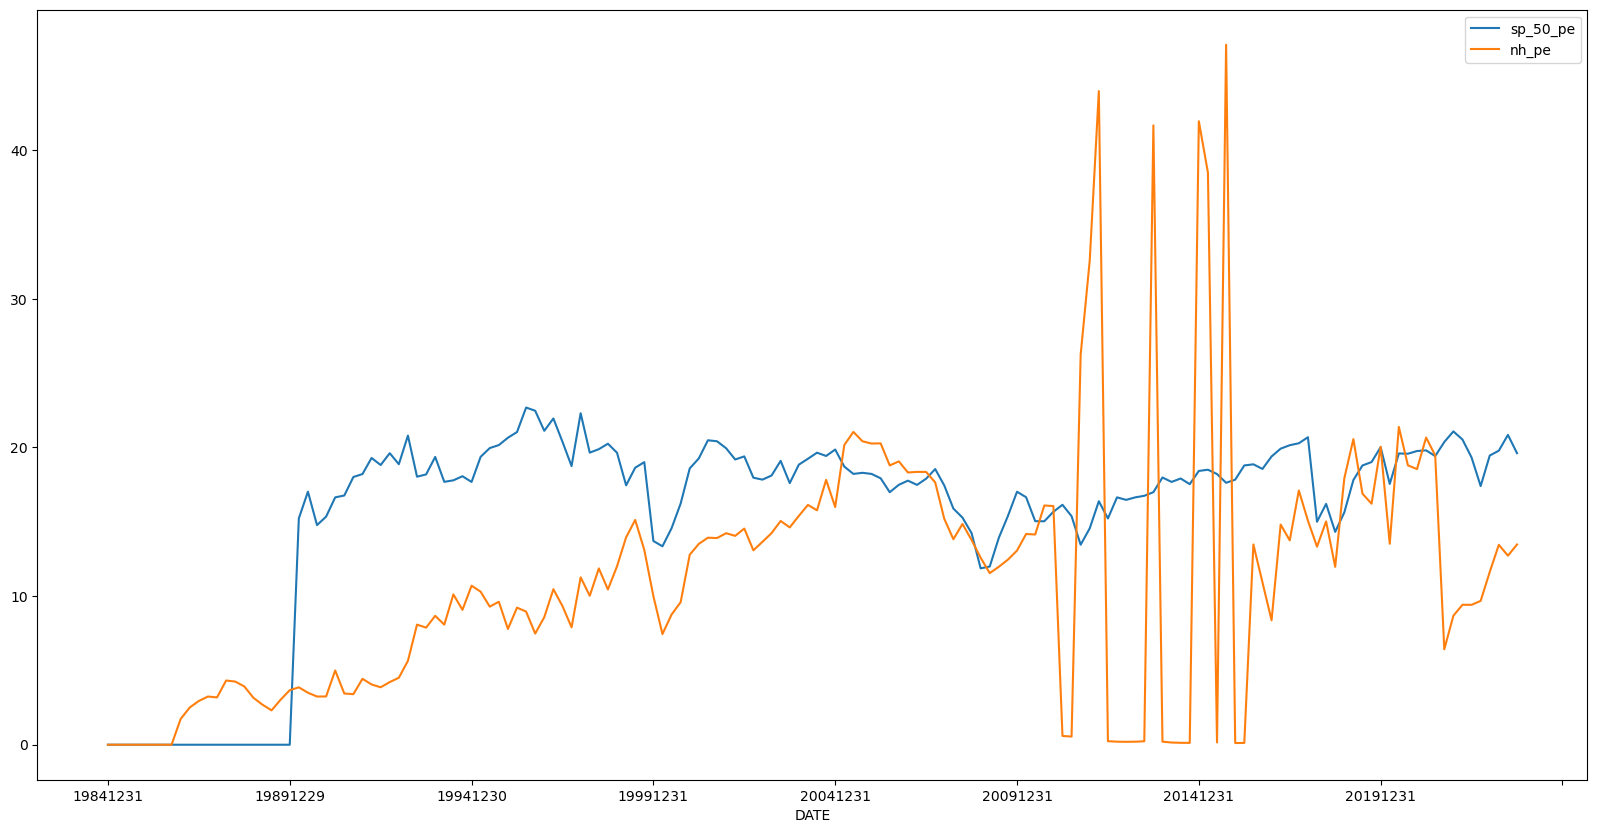

In [14]:
dfg[['sp_50_pe','nh_pe']].plot(figsize = (20,10))